# 2021-2022 NBA Player Stats DataSet

## Veri Seti Hikayesi

## Veri Setinin Öznitelikleri

In [78]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# ADIM 1
## Veri setinin yüklenmesi:

In [67]:
data=pd.read_csv("/Users/ahmet/Library/Containers/com.microsoft.Excel/Data/Downloads/2021-2022 NBA Player Stats.csv.xls" ,encoding="Windows-1252", delimiter=";")

## Veri Setinin Özellikleri

In [68]:
data.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,34,20,25.3,3.4,8.1,...,0.574,2.4,5.3,7.7,1.3,0.6,0.6,1.1,2.2,7.9
1,2,Steven Adams,C,28,MEM,44,43,25.7,2.6,4.9,...,0.566,4.3,4.9,9.3,3.0,1.0,0.6,1.6,1.7,6.7
2,3,Bam Adebayo,C,24,MIA,21,21,32.9,6.9,13.3,...,0.767,2.6,7.3,10.0,3.2,1.2,0.5,2.9,3.1,18.7
3,4,Santi Aldama,PF,21,MEM,25,0,10.5,1.4,3.8,...,0.579,0.9,1.6,2.5,0.5,0.1,0.2,0.3,0.9,3.4
4,5,LaMarcus Aldridge,C,36,BRK,32,10,23.1,5.9,10.3,...,0.862,1.5,4.1,5.7,0.9,0.4,1.1,0.8,1.7,13.8


In [69]:
data.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,...,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000
mean,295.500000,25.761017,24.527119,11.620339,18.335593,2.906610,6.516441,0.423781,0.879153,2.604068,...,0.641332,0.813220,2.577458,3.390847,1.738814,0.588983,0.369322,0.983220,1.544068,7.865593
std,170.462606,4.162102,15.012562,15.217214,10.135615,2.303774,4.920442,0.163015,0.872085,2.308856,...,0.298489,0.755778,1.891797,2.453787,1.817469,0.442171,0.407891,0.853321,0.844149,6.332251
min,1.000000,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,148.250000,23.000000,9.000000,0.000000,9.700000,1.100000,2.900000,0.375250,0.100000,0.700000,...,0.580000,0.300000,1.225000,1.600000,0.500000,0.300000,0.100000,0.400000,1.000000,3.000000
50%,295.500000,25.000000,28.000000,3.000000,17.750000,2.400000,5.200000,0.436000,0.700000,2.100000,...,0.743000,0.600000,2.300000,3.000000,1.100000,0.500000,0.300000,0.800000,1.600000,6.500000
75%,442.750000,28.000000,38.000000,21.000000,27.175000,4.100000,9.275000,0.495750,1.400000,4.100000,...,0.833000,1.100000,3.400000,4.500000,2.300000,0.900000,0.500000,1.300000,2.200000,11.375000
max,590.000000,41.000000,47.000000,47.000000,38.100000,10.800000,21.400000,1.000000,4.900000,12.800000,...,1.000000,4.300000,11.400000,15.000000,10.000000,2.300000,3.000000,4.800000,4.000000,29.300000


In [70]:
data.shape

(590, 30)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      590 non-null    int64  
 1   Player  590 non-null    object 
 2   Pos     590 non-null    object 
 3   Age     590 non-null    int64  
 4   Tm      590 non-null    object 
 5   G       590 non-null    int64  
 6   GS      590 non-null    int64  
 7   MP      590 non-null    float64
 8   FG      590 non-null    float64
 9   FGA     590 non-null    float64
 10  FG%     590 non-null    float64
 11  3P      590 non-null    float64
 12  3PA     590 non-null    float64
 13  3P%     590 non-null    float64
 14  2P      590 non-null    float64
 15  2PA     590 non-null    float64
 16  2P%     590 non-null    float64
 17  eFG%    590 non-null    float64
 18  FT      590 non-null    float64
 19  FTA     590 non-null    float64
 20  FT%     590 non-null    float64
 21  ORB     590 non-null    float64
 22  DR

## Veri Setinden Sayısal Olmayan Bazı Özniteliklerin Çıkarılması

In [72]:
data.drop(["Rk","Player","Tm"], axis=1, inplace=True)

In [73]:
data.head()

,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,C,22,34,20,25.3,3.4,8.1,0.412,0.3,1.3,...,0.574,2.4,5.3,7.7,1.3,0.6,0.6,1.1,2.2,7.9
1,C,28,44,43,25.7,2.6,4.9,0.521,0.0,0.0,...,0.566,4.3,4.9,9.3,3.0,1.0,0.6,1.6,1.7,6.7
2,C,24,21,21,32.9,6.9,13.3,0.518,0.0,0.0,...,0.767,2.6,7.3,10.0,3.2,1.2,0.5,2.9,3.1,18.7
3,PF,21,25,0,10.5,1.4,3.8,0.372,0.2,1.5,...,0.579,0.9,1.6,2.5,0.5,0.1,0.2,0.3,0.9,3.4
4,C,36,32,10,23.1,5.9,10.3,0.574,0.4,1.1,...,0.862,1.5,4.1,5.7,0.9,0.4,1.1,0.8,1.7,13.8


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pos     590 non-null    object 
 1   Age     590 non-null    int64  
 2   G       590 non-null    int64  
 3   GS      590 non-null    int64  
 4   MP      590 non-null    float64
 5   FG      590 non-null    float64
 6   FGA     590 non-null    float64
 7   FG%     590 non-null    float64
 8   3P      590 non-null    float64
 9   3PA     590 non-null    float64
 10  3P%     590 non-null    float64
 11  2P      590 non-null    float64
 12  2PA     590 non-null    float64
 13  2P%     590 non-null    float64
 14  eFG%    590 non-null    float64
 15  FT      590 non-null    float64
 16  FTA     590 non-null    float64
 17  FT%     590 non-null    float64
 18  ORB     590 non-null    float64
 19  DRB     590 non-null    float64
 20  TRB     590 non-null    float64
 21  AST     590 non-null    float64
 22  ST

In [75]:
data.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,...,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000
mean,25.761017,24.527119,11.620339,18.335593,2.906610,6.516441,0.423781,0.879153,2.604068,0.269481,...,0.641332,0.813220,2.577458,3.390847,1.738814,0.588983,0.369322,0.983220,1.544068,7.865593
std,4.162102,15.012562,15.217214,10.135615,2.303774,4.920442,0.163015,0.872085,2.308856,0.166584,...,0.298489,0.755778,1.891797,2.453787,1.817469,0.442171,0.407891,0.853321,0.844149,6.332251
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,9.000000,0.000000,9.700000,1.100000,2.900000,0.375250,0.100000,0.700000,0.176000,...,0.580000,0.300000,1.225000,1.600000,0.500000,0.300000,0.100000,0.400000,1.000000,3.000000
50%,25.000000,28.000000,3.000000,17.750000,2.400000,5.200000,0.436000,0.700000,2.100000,0.316000,...,0.743000,0.600000,2.300000,3.000000,1.100000,0.500000,0.300000,0.800000,1.600000,6.500000
75%,28.000000,38.000000,21.000000,27.175000,4.100000,9.275000,0.495750,1.400000,4.100000,0.371000,...,0.833000,1.100000,3.400000,4.500000,2.300000,0.900000,0.500000,1.300000,2.200000,11.375000
max,41.000000,47.000000,47.000000,38.100000,10.800000,21.400000,1.000000,4.900000,12.800000,1.000000,...,1.000000,4.300000,11.400000,15.000000,10.000000,2.300000,3.000000,4.800000,4.000000,29.300000


In [76]:
data.isnull().sum()

Pos     0
Age     0
G       0
GS      0
MP      0
FG      0
FGA     0
FG%     0
3P      0
3PA     0
3P%     0
2P      0
2PA     0
2P%     0
eFG%    0
FT      0
FTA     0
FT%     0
ORB     0
DRB     0
TRB     0
AST     0
STL     0
BLK     0
TOV     0
PF      0
PTS     0
dtype: int64

/Users/ahmet/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


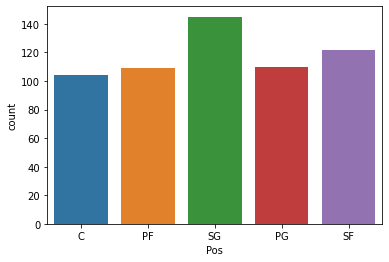

In [79]:
sns.countplot(data['Pos'],label="Count")
plt.show()

# Adım 2

## Eksik değer analizi:

In [95]:
data.isnull().sum()

Pos     0
Age     0
G       0
GS      0
MP      0
FG      0
FGA     0
FG%     0
3P      0
3PA     0
3P%     0
2P      0
2PA     0
2P%     0
eFG%    0
FT      0
FTA     0
FT%     0
ORB     0
DRB     0
TRB     0
AST     0
STL     0
BLK     0
TOV     0
PF      0
PTS     0
dtype: int64

# Adım 3

## Aykırı Değer Analizi:

### Bu kısımda tüm değiklenlerimizdeki aykırı değerleri görselleştirme yaparak(box plot yöntemi ile) ve sayısal olarak hangi değer aralığı dışında kalanların aykırı değer olacağını tespit ettik.

<AxesSubplot:xlabel='Age'>

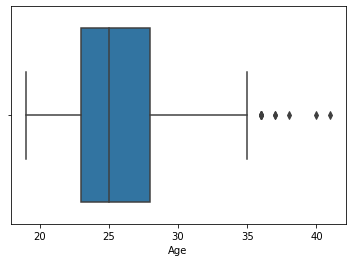

In [96]:
data_Age=data['Age']
sns.boxplot(x=data_Age)

In [97]:
Q1=data_Age.quantile(0.25)
Q3=data_Age.quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1- 1.5*IQR
upper_bound=Q3+1.5*IQR
print("lower bound is" + str(lower_bound))
print("upper bound is" + str(upper_bound))
print(Q1)
print(Q3)

lower bound is15.5
upper bound is35.5
23.0
28.0


<AxesSubplot:xlabel='G'>

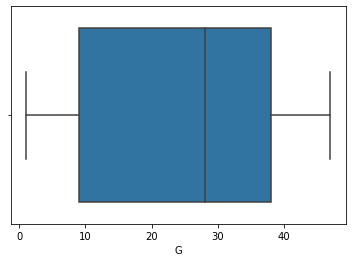

In [98]:
data_G=data['G']
sns.boxplot(x=data_G)

In [99]:
Q1=data_G.quantile(0.25)
Q3=data_G.quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1- 1.5*IQR
upper_bound=Q3+1.5*IQR
print("lower bound is" + str(lower_bound))
print("upper bound is" + str(upper_bound))
print(Q1)
print(Q3)

lower bound is-34.5
upper bound is81.5
9.0
38.0


<AxesSubplot:xlabel='GS'>

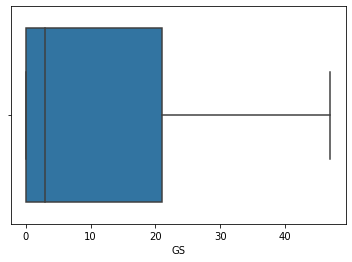

In [102]:
data_Gs=data['GS']
sns.boxplot(x=data_Gs)

In [103]:
Q1=data_Gs.quantile(0.25)
Q3=data_Gs.quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1- 1.5*IQR
upper_bound=Q3+1.5*IQR
print("lower bound is" + str(lower_bound))
print("upper bound is" + str(upper_bound))
print(Q1)
print(Q3)

lower bound is-31.5
upper bound is52.5
0.0
21.0


<AxesSubplot:xlabel='MP'>

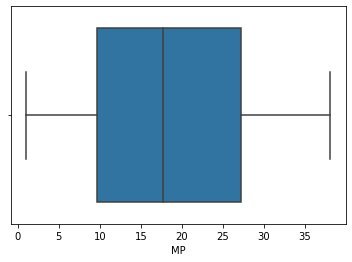

In [104]:
data_MP=data['MP']
sns.boxplot(x=data_MP)

In [105]:
Q1=data_MP.quantile(0.25)
Q3=data_MP.quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1- 1.5*IQR
upper_bound=Q3+1.5*IQR
print("lower bound is" + str(lower_bound))
print("upper bound is" + str(upper_bound))
print(Q1)
print(Q3)

lower bound is-16.512500000000003
upper bound is53.3875
9.7
27.175


<AxesSubplot:xlabel='FG'>

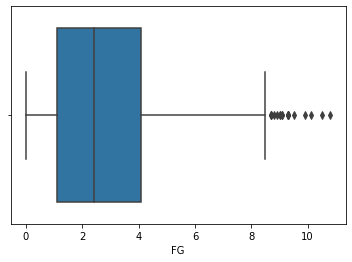

In [106]:
data_FG=data['FG']
sns.boxplot(x=data_FG)

In [113]:
Q1=data_FG.quantile(0.25)
Q3=data_FG.quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1- 1.5*IQR
upper_bound=Q3+1.5*IQR
print("lower bound is" + str(lower_bound))
print("upper bound is" + str(upper_bound))
print(Q1)
print(Q3)

lower bound is-3.399999999999999
upper bound is8.599999999999998
1.1
4.1


<AxesSubplot:xlabel='FGA'>

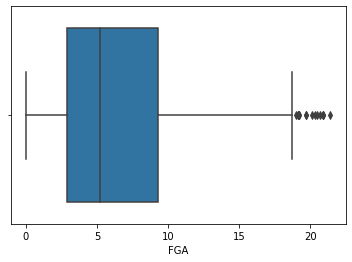

In [107]:
data_FGA=data['FGA']
sns.boxplot(x=data_FGA)

In [114]:
Q1=data_FGA.quantile(0.25)
Q3=data_FGA.quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1- 1.5*IQR
upper_bound=Q3+1.5*IQR
print("lower bound is" + str(lower_bound))
print("upper bound is" + str(upper_bound))
print(Q1)
print(Q3)

lower bound is-6.6625
upper bound is18.8375
2.9
9.275


<AxesSubplot:xlabel='3P'>

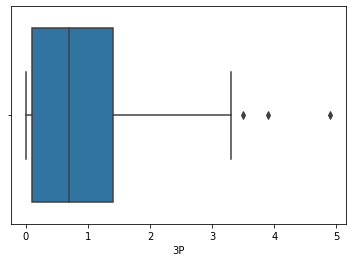

In [108]:
data_3P=data['3P']
sns.boxplot(x=data_3P)

In [115]:
Q1=data_3P.quantile(0.25)
Q3=data_3P.quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1- 1.5*IQR
upper_bound=Q3+1.5*IQR
print("lower bound is" + str(lower_bound))
print("upper bound is" + str(upper_bound))
print(Q1)
print(Q3)

lower bound is-1.8499999999999996
upper bound is3.3499999999999996
0.1
1.4


<AxesSubplot:xlabel='3PA'>

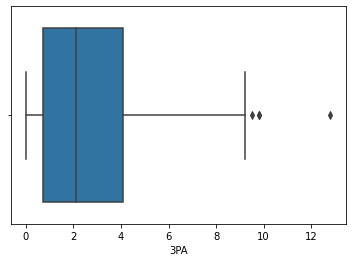

In [109]:
data_3PA=data['3PA']
sns.boxplot(x=data_3PA)

In [116]:
Q1=data_3PA.quantile(0.25)
Q3=data_3PA.quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1- 1.5*IQR
upper_bound=Q3+1.5*IQR
print("lower bound is" + str(lower_bound))
print("upper bound is" + str(upper_bound))
print(Q1)
print(Q3)

lower bound is-4.3999999999999995
upper bound is9.2
0.7
4.1


<AxesSubplot:xlabel='2P'>

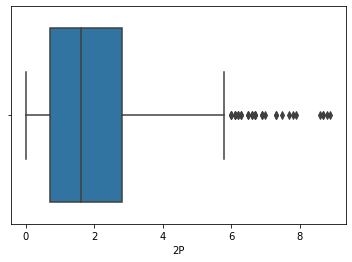

In [118]:
data_2P=data['2P']
sns.boxplot(x=data_2P)

In [119]:
Q1=data_2P.quantile(0.25)
Q3=data_2P.quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1- 1.5*IQR
upper_bound=Q3+1.5*IQR
print("lower bound is" + str(lower_bound))
print("upper bound is" + str(upper_bound))
print(Q1)
print(Q3)

lower bound is-2.4499999999999993
upper bound is5.949999999999999
0.7
2.8


<AxesSubplot:xlabel='2PA'>

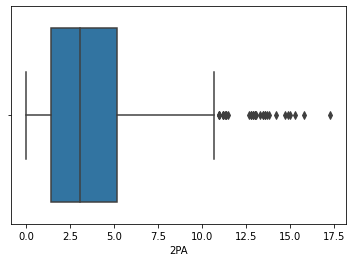

In [120]:
data_2PA=data['2PA']
sns.boxplot(x=data_2PA)

In [121]:
Q1=data_2PA.quantile(0.25)
Q3=data_2PA.quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1- 1.5*IQR
upper_bound=Q3+1.5*IQR
print("lower bound is" + str(lower_bound))
print("upper bound is" + str(upper_bound))
print(Q1)
print(Q3)

lower bound is-4.300000000000001
upper bound is10.9
1.4
5.2


<AxesSubplot:xlabel='FT'>

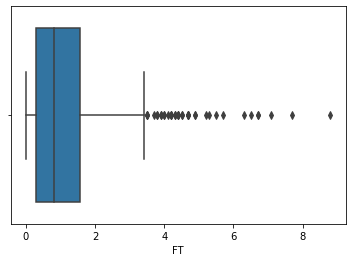

In [112]:
data_FT=data['FT']
sns.boxplot(x=data_FT)

In [122]:
Q1=data_FT.quantile(0.25)
Q3=data_FT.quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1- 1.5*IQR
upper_bound=Q3+1.5*IQR
print("lower bound is" + str(lower_bound))
print("upper bound is" + str(upper_bound))
print(Q1)
print(Q3)

lower bound is-1.6125
upper bound is3.4875000000000003
0.3
1.5750000000000002


# Adım 4 

## Veri Setinin Bağımlı ve Bağımsız Değişkenler Olarak Ayrılması:

In [82]:
df = data.copy()
y = data["Pos"]
X = data.drop(['Pos'], axis=1)

# Adım 5

## Veri Ölçekleme

### Bu kısımda verimize standartlaştırma işlemi yaptık.

In [123]:
scaler = StandardScaler()

In [83]:
scaler.fit(X)
X = scaler.transform(X)

# Adım 6

## Veri Setini Test ve Train olarak ayırma:

In [84]:
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=0)

# Adım 7

## Algoritmaların Uygulanması:

### Artık algoritmaları uygulayabiliriz.Bu kısımda veri setimize decision tree,random forest ve adaboost algoritmalarını uygulayacağız.Algoritmaları accuracy score larına göre kıyasalayacağız.Ardından bütün algoritmalara 10 katlamalı çapraz doğrulama uygulayayıp tekrar bir accuracy score değeri hesaplayacağız.

## Decision Tree Algoritması:
#### Bu algoritmada paremetre olarak max_depth kullandım.Bu parametre için çeşitli denemeler yaptım.7,8,9,10,11,12,13,15,20 hepsini tek tek denedim.Accuracy score olarak en yüksek değeri 20 de elde ettim o yüzden onu tercih ettim.

In [89]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy',max_depth=20)

dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
accuracy_score(y_test, y_pred)

0.3898305084745763

## Çapraz Doğrulama Uygulaması:

#### Ardından 10  katlamalı çapraz doğrulama uyguladım .Bu uygulamadan sonra da önceki değere yakın bir değer elde ettim.

In [90]:
from sklearn.model_selection import cross_val_score

basari = cross_val_score(estimator = dtc , X=X_train, y=y_train , cv = 10)
print(basari.mean())
print(basari.std())

0.3749128919860627
0.07262772539463398


## Random Forest Algoritması:
#### Bu algoritmda ağaç sayısını paremetre olarak seçtim 10 ile 20 arasında çeşitli sayılar denedim .Gözlemlerime göre ağaç sayısını artırdıkça modelin doğruluk skorunda artış olmadığı yöndeydi o yüzden 14 ü seçtim.

In [91]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=15, criterion = 'entropy')
rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)
accuracy_score(y_test, y_pred)

0.4519774011299435

## Çapraz Doğrulama Uygulaması:

#### Ardından 10  katlamalı çapraz doğrulama uyguladım .Bu uygulamadan sonra da önceki değere yakın bir değer elde ettim bu modelin doğruluğu için önemliydi.

In [92]:
from sklearn.model_selection import cross_val_score

basari = cross_val_score(estimator = rfc , X=X_train, y=y_train , cv = 10)
print(basari.mean())
print(basari.std())

0.4041811846689895
0.07090304584465863


## Adaboost Algoritması:

#### Bu algoritmada ağaç sayısını parametre olarak seçtim . Çeşitli denemeler yaptıktan sonra 15 te karar kıldım.

In [93]:
ad = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=15)
ad.fit(X_train,y_train)
y_pred = ad.predict(X_test)
accuracy_score(y_test, y_pred)

0.4519774011299435

## Çapraz Doğrulama Uygulaması:

#### Ardından 10  katlamalı çapraz doğrulama uyguladım .

In [94]:
basari = cross_val_score(estimator = ad , X=X_train, y=y_train , cv = 10)
print(basari.mean())
print(basari.std())

0.41660859465737515
0.07758742091018664


# ADIM 8

## PCA UYGULAMASI

#### Türkçesi “Temel Bileşenler Analizi” olan PCA tanıma, sınıflandırma, görüntü sıkıştırma alanlarında kullanılan yararlı bir istatistiksel tekniktir. Temel amacı yüksek boyutlu verilerde en yüksek varyans ile veri setini tutmak ancak bunu yaparken boyut indirgemeyi sağlamak olan bir tekniktir. Fazla boyutlu verilerdeki genel özellikleri bularak boyut sayısının azaltılmasını, verinin sıkıştırılmasını sağlar. Boyut azalmasıyla bazı özelliklerin kaybedileceği kesindir; fakat amaçlanan, bu kaybolan özelliklerin popülasyon hakkında çok az bilgi içeriyor olmasıdır. Bu yöntem, yüksek korelasyonlu değişkenleri bir araya getirerek, verilerdeki en çok varyasyonu oluşturan “temel bileşenler” olarak adlandırılan daha az sayıda yapay değişken kümesi oluşturur.

## Import Edilmesi ve Fit edilmesi:

In [124]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 7)

X_train2 = pca.fit_transform(X_train)
X_test2 = pca.transform(X_test)

## Decision Tree Algoritması(PCA'lı)

In [128]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy',max_depth=10)

dtc.fit(X_train2,y_train)
y_pred = dtc.predict(X_test2)
accuracy_score(y_test, y_pred)

0.3615819209039548

## Çapraz Doğrulama Uygulaması:
#### Ardından 10 katlamalı çapraz doğrulama uyguladım .Önceki değere yakın bir accuracy score elde ettim.

In [129]:
from sklearn.model_selection import cross_val_score

basari = cross_val_score(estimator =dtc , X=X_train2, y=y_train , cv = 10)
print(basari.mean())
print(basari.std())

0.428513356562137
0.05018674968200254


## Random Forest Algoritması(PCA'Lı)

In [130]:
rfc = RandomForestClassifier(n_estimators=14, criterion = 'entropy')
rfc.fit(X_train2,y_train)

y_pred = rfc.predict(X_test2)
accuracy_score(y_test, y_pred)

0.4406779661016949

## Çapraz Doğrulama Uygulaması:
### Ardından 10 katlamalı çapraz doğrulama uyguladım .

In [131]:
basari = cross_val_score(estimator =rfc , X=X_train2, y=y_train , cv = 10)
print(basari.mean())
print(basari.std())

0.4408246225319396
0.04828536541099839


## Adaboost algoritması(PCA'LI)

In [132]:
ad = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=15)
ad.fit(X_train2,y_train)
y_pred = ad.predict(X_test2)
accuracy_score(y_test, y_pred)

0.3785310734463277

## Çapraz Doğrulama Uygulaması:
#### Ardından 10 katlamalı çapraz doğrulama uyguladım .

In [133]:
from sklearn.model_selection import cross_val_score

basari = cross_val_score(estimator = ad, X=X_train2, y=y_train , cv = 10)
print(basari.mean())
print(basari.std())

0.421602787456446
0.08207816523274222
